In [1]:
from bm3d import bm3d, BM3DProfile
from bm4d import bm4d
from mrirt.utils import *

## Reading Data

In [2]:
filename="../data/meas_MID00170_FID49494_Non_Cartesian_2D_GA_FA5_NOG_5_NOCustRF_10000SP_perf_bw1600.dat"
filename="../data/meas_MID00021_FID49509_Non_Cartesian_2D_GA_FA5_NOG_5_NOCustRF_10000SP_perf_bw1600.dat"
dirname=Path(filename).parent
index=-1
window=8

In [3]:
# import io_twixt
# hdr = io_twixt.parse_twixt_header(filename)
# hdr2 = io_twixt.parse_twixt_header(filename2)
# adFree = get_specials(hdr, type="adFree",index=index)
# adFree2 = get_specials(hdr2, type="adFree",index=index)
# alFree = get_specials(hdr, type="alFree",index=index)
# alFree2 = get_specials(hdr2, type="alFree",index=index)

In [4]:
read_data(filename,index)

Reading raw data
Software version: VD/VE (!?)

Scan  0


100%|██████████| 56.1M/56.1M [00:00<00:00, 1.40GB/s]


[{'dThickness': 499.84, 'dPhaseFOV': 500.0, 'dReadoutFOV': 500.0, 'sNormal': {'dTra': 1.0}}]
1
[0]
Scan  1


100%|██████████| 597M/597M [00:00<00:00, 1.30GB/s]


[{'dThickness': 10.0, 'dPhaseFOV': 340.0, 'dReadoutFOV': 340.0, 'sPosition': {'dSag': 0.638344706134, 'dCor': -37.7838815569, 'dTra': 45.1626486998}, 'sNormal': {'dSag': 1.0}}]
1
[0]
(30, 10000, 256)
(30, 10000, 256)
Generating trajectory data
(3, 256, 10000)
Writing sequence parameters


In [5]:


data_bart=cfl.readcfl(str(dirname / "data_bart_raw"))
traj_bart=cfl.readcfl(str(dirname / "traj"))
with open(str(dirname / "param_seq.json"), 'r') as fp:
        paramseq=json.load(fp)

# paramseq["window"]=window
print(paramseq)

{'ncoils': 30, 'nspokes': 10000, 'npoint': 256}


In [6]:
print(data_bart.shape)
print(traj_bart.shape)

(1, 256, 10000, 30)
(3, 256, 10000)


## RTNLINV

Coil images
Using adjoint with density adjustment to approximate inverse nufft
Est. image size: 256x256x1


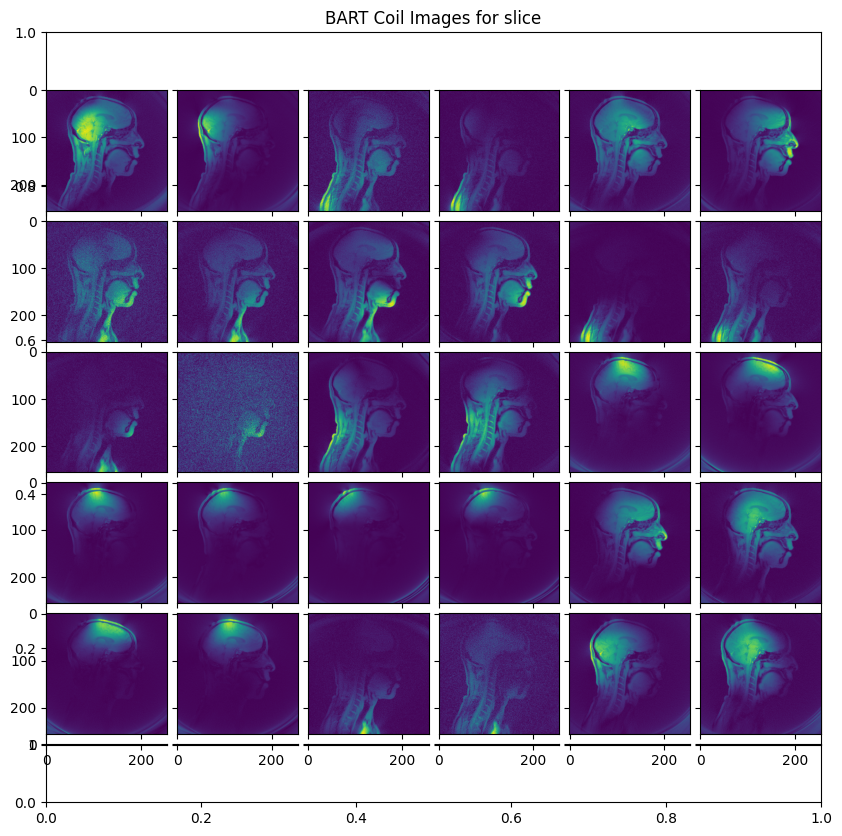

Regridding to cartesian grid
Applying coil compression to k-space data


In [7]:
coil_compression_bart(data_bart, traj_bart, dirname=dirname,ncoils=12, lowmem=False, inverse_nufft=False)


In [8]:
nspokes=paramseq["nspokes"]
nimages=int(nspokes/window)
os.system("bart reshape $(bart bitmask 2 10) {} {} {} {}".format(window,nimages,str(dirname / "data_bart_cc"),str(dirname / "data_bart_rt" )))
# os.system("bart transpose 2 10 data_bart_rt data_bart_rt")
os.system("bart reshape $(bart bitmask 2 10) {} {} {} {}".format(window,nimages,str(dirname / "traj"),str(dirname / "traj_rt")))
# os.system("bart transpose 2 10 traj_rt traj_rt")

0

In [ ]:
traj_bart_rt=cfl.readcfl(str(dirname / "traj_rt"))
data_bart_rt=cfl.readcfl(str(dirname / "data_bart_rt"))

reco_rtnlinv(data_bart_rt, traj_bart_rt,dirname=dirname, param_reco=None, niter=10,framebounds=(500,600))

Reconstruction of the serie of images with RTNLINV
md_mul optimized by blas_mul_sscal: 
 Old dims/strides:
[  2   3 256   8   1   1   1   1   1   1   1 100 ]
[  4   8  24 6144   0   0   0   0   0   0   0 49152 ]
[  4   8  24 6144   0   0   0   0   0   0   0 49152 ]
[  0   0   0   0   0   0   0   0   0   0   0   0 ]
optimized dims/strides (N=1 by strided kernel):
[1228800 ]
[  4 ]
[  4 ]
[  0 ]
Start gridding psf ...ksp : [  1 256   8   1   1   1   1   1   1   1 100   1   1   1   1   1 ]
cim : [512 512   1   1   1   1   1   1   1   1 100   1   1   1   1   1 ]
traj: [  3 256   8   1   1   1   1   1   1   1 100   1   1   1   1   1 ]
wgh : [  1 256   8   1   1   1   1   1   1   1 100   1   1   1   1   1 ]
md_mul optimized by blas_mul_sscal: 
 Old dims/strides:
[  2 512 512   1   1   1   1   1   1   1   1   1   1   1   1   1   1   4 ]
[  4   8 4096   0   0   0   0   0   0   0   0   0   0   0   0   0   0 2097152 ]
[  4   8 4096   0   0   0   0   0   0   0   0   0   0   0   0   0   0 2097152 

In [ ]:
image_bart_rt=cfl.readcfl(str(dirname / "img_bart_rt"))

In [ ]:
generate_gif(np.moveaxis(image_bart_rt,-1,0).squeeze(), filename_gif=str(dirname / "motion_bart_rtnlinv_newtraj_fr500_600.gif"))

## PICS

Kept channels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 22 23 26 27 28 29]
Coil images
Using adjoint with density adjustment to approximate inverse nufft
Est. image size: 256x256x1


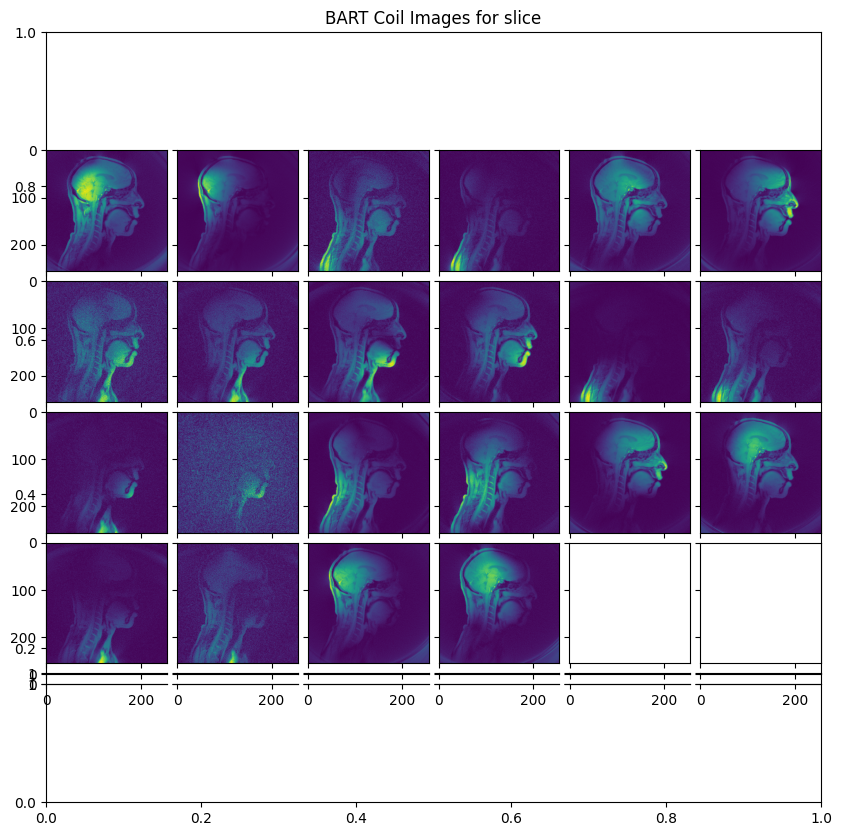

Regridding to cartesian grid
Applying coil compression to k-space data
Calculating coil sensi
---------------------------------------------
| CTR1 | CTR2 |  Crop  |      Est. MSE      |
---------------------------------------------
|    1 |    1 | 0.9900 | 5.371315840000e+08 |
|      |    2 | 0.8900 | 2.057149120000e+08 |
|      |    3 | 0.7900 | 2.057149120000e+08 |
|    2 |    1 | 0.8400 | 2.057149120000e+08 |
|      |    2 | 0.8900 | 2.057149120000e+08 |
|    3 |    1 | 0.8650 | 2.057149120000e+08 |
|      |    2 | 0.8400 | 2.057149120000e+08 |
|    4 |    1 | 0.8525 | 2.057149120000e+08 |
|      |    2 | 0.8650 | 2.057149120000e+08 |
|    5 |    1 | 0.8587 | 2.057149120000e+08 |
|      |    2 | 0.8525 | 2.057149120000e+08 |
|    6 |    1 | 0.8556 | 2.057149120000e+08 |
|      |    2 | 0.8587 | 2.057149120000e+08 |
|    7 |    1 | 0.8572 | 2.057149120000e+08 |
|      |    2 | 0.8556 | 2.057149120000e+08 |
|    8 |    1 | 0.8564 | 2.057149120000e+08 |
|      |    2 | 0.8572 | 2.05714

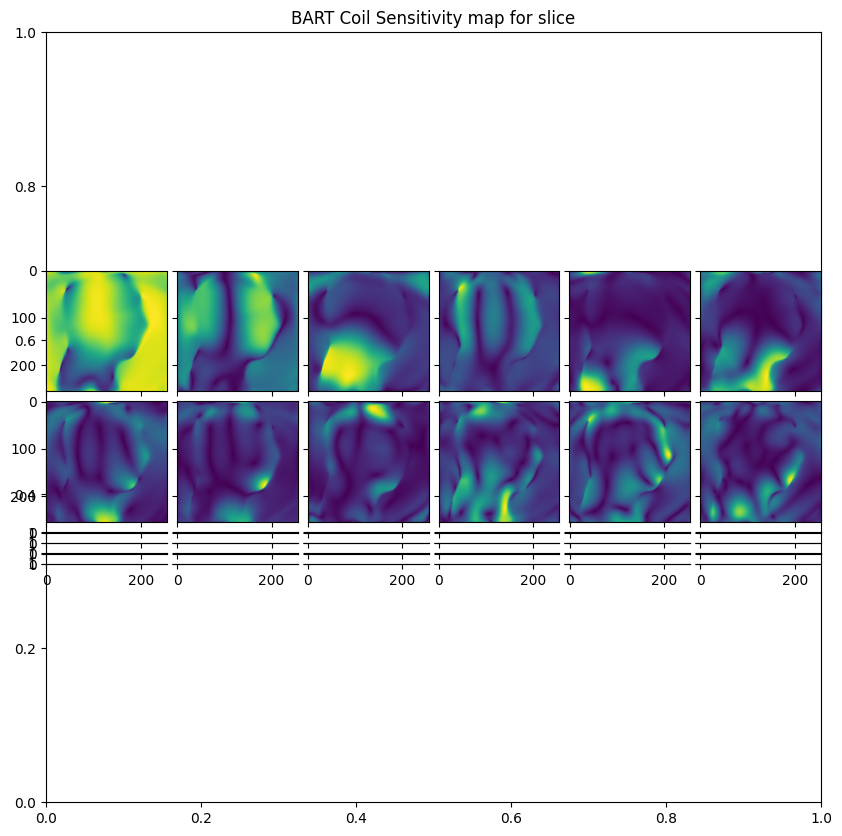

In [9]:
excluded_channels=[16,17,18,19,20,21,24,25]
coil_compression_bart(data_bart, traj_bart,dirname=dirname, ncoils=12, lowmem=False, inverse_nufft=False,calc_sensi=True,excluded_channels=excluded_channels)


In [10]:
# %%bash

# bart -r data_bart_raw ncalib -x256:256:1 --cgiter=25 -i10 -t traj data_bart_raw b1_nlinv
# COIL_FLAG=$(bart bitmask 3)
# bart normalize $COIL_FLAG b1_nlinv b1_nlinv

In [11]:
# b1_nlinv=cfl.readcfl("b1_nlinv")
# plot_image_grid(np.abs(b1_nlinv.squeeze().T),nb_row_col=(5,6));

In [ ]:
nspokes=paramseq["nspokes"]
nimages=int(nspokes/window)

os.system("bart reshape $(bart bitmask 2 10) {} {} {} {}".format(window,nimages,str(dirname / "data_bart_cc"),str(dirname / "data_bart_rt" )))
os.system("bart reshape $(bart bitmask 2 10) {} {} {} {}".format(window,nimages,str(dirname / "traj"),str(dirname / "traj_rt")))
os.system("bart reshape $(bart bitmask 2 10) {} {} {} {}".format(window,nimages,str(dirname / "data_bart_raw"),str(dirname / "data_bart_raw_rt")))

0

In [13]:
# paramReco={"lambda_LLR":0.05,"block_size":8,"lambda_wav":0.01}
# paramReco={"block_size":8,"lambda_wav":0.001,"lambda_TVt":0.01}
paramReco={"lambda_TVt":0.02}
# paramReco={"block_size":8,"lambda_TVt":0.02,"lambda_wav":0.00002}
# paramReco={"block_size":8,"lambda_TGVt":0.1}
# paramReco={"block_size":8,"lambda_TVt":0.02,"lambda_LLR":0.05}
# paramReco={"lambda_LLR":0.001,"block_size":8,"lambda_TVt":0.01}
# paramReco={"lambda_TVx":0.0002,"block_size":8,"lambda_TVt":0.02,"use_infimal_conv":True}

data_bart_rt=cfl.readcfl(str(dirname / "data_bart_rt"))
# data_bart_rt=cfl.readcfl("data_bart_raw_rt")
print(data_bart_rt.shape)
traj_bart_rt=cfl.readcfl(str(dirname / "traj_rt"))
print(traj_bart_rt.shape)
b1=cfl.readcfl(str(dirname / "b1_bart_cc"))
# b1=cfl.readcfl("b1_nlinv")

print(b1.shape)
reco_pics(data_bart_rt, traj_bart_rt, b1,dirname=dirname, param_reco=paramReco, niter=20,use_mt=True)

(1, 256, 8, 12, 1, 1, 1, 1, 1, 1, 1250)
(3, 256, 8, 1, 1, 1, 1, 1, 1, 1, 1250)
(256, 256, 1, 12)
Using 64 threads for PICS
BART COMMMAND : pics -d5 -e -S -i20 -RT:1024:0:0.02 -t 
Reconstruction of the serie of images with PICS
[  1 256   8  12   1   1   1   1   1   1 1250   1   1   1   1   1 ]
[256 256   1  12   1   1   1   1   1   1 1250   1   1   1   1   1 ]
ksp : [  1 256   8  12   1   1   1   1   1   1 1250   1   1   1   1   1 ]
cim : [256 256   1  12   1   1   1   1   1   1 1250   1   1   1   1   1 ]
traj: [  3 256   8   1   1   1   1   1   1   1 1250   1   1   1   1   1 ]
wgh : [  1 256   8   1   1   1   1   1   1   1 1250   1   1   1   1   1 ]
NUFFT: Toeplitz mode
ksp : [  1 256   8   1   1   1   1   1   1   1 1250   1   1   1   1   1   1 ]
cim : [512 512   1   1   1   1   1   1   1   1 1250   1   1   1   1   1   1 ]
traj: [  3 256   8   1   1   1   1   1   1   1 1250   1   1   1   1   1   1 ]
wgh : [  1 256   8   1   1   1   1   1   1   1 1250   1   1   1   1   1   1 ]
Scaling:

In [3]:
filename_gif=str(dirname / (Path(filename).stem + "_motion_bart_pics.gif"))
filename_gif

'../data/meas_MID00021_FID49509_Non_Cartesian_2D_GA_FA5_NOG_5_NOCustRF_10000SP_perf_bw1600_motion_bart_pics.gif'

In [4]:
image_bart_rt_pics=cfl.readcfl(str(dirname / "img_bart_rt_pics"))
generate_gif(np.moveaxis(image_bart_rt_pics,-1,0).squeeze(), filename_gif=filename_gif)

In [5]:
img_serie=np.abs(image_bart_rt_pics.squeeze())
sigma_est = estimate_sigma_wavelet_3d(img_serie)
print("Estimated noise sigma from wavelet coefficients: ", sigma_est)
img_serie_denoised=bm4d(img_serie,10*sigma_est)

Estimated noise sigma from wavelet coefficients:  0.98718053


In [6]:
filename_gif_bm4d=str(dirname / (Path(filename).stem + "_motion_bart_pics_bm4d.gif"))
generate_gif(np.moveaxis(img_serie_denoised,-1,0).squeeze(), filename_gif=filename_gif_bm4d)